# Employee Turnover Survival Analysis

**Column Attributes**
* stag - Experience (time)
* event - Employee turnover
* gender - Employee's gender, female(f), or male(m)
* age - Employee's age (year)
* industry - Employee's Industry
* profession - Employee's profession
* traffic - From what pipelene employee came to the company. You contacted the company directly (after learning from advertising, knowing the company's brand, etc.) - advert You contacted the company directly on the recommendation of your friend - NOT an employee of this company-recNErab You contacted the company directly on the recommendation of your friend - an employee of this company - referal You have applied for a vacancy on the job site - youjs The recruiting agency brought you to the employer - KA Invited by the Employer, we knew him before the employment - friends The employer contacted you on the recommendation of a person who knows you - rabrecNErab The employer reached you through your resume on the job site - empjs
* coach - Presence of a coach (training) on probation
* head_gender - head (supervisor) gender
* greywage - The salary does not seem to the tax authorities. Greywage in Russia or Ukraine means that the employer (company) pay
* way - Employee's way of transportation
* extraversion - Extraversion score
* independ - Independend score
* selfcontrol - Selfcontrol score
* anxiety - Anxiety score
* novator - Novator score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/turnover.csv.xls', sep=',', header='infer')

In [5]:
df.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [6]:
# check for missing values
df.isna().sum()

stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

No missing values for the observations

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


In [8]:
df.describe()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,36.627526,0.505757,31.066965,5.592383,5.478034,5.597254,5.665633,5.879628
std,34.096597,0.500188,6.996147,1.851637,1.703312,1.980101,1.709176,1.904016
min,0.394251,0.000000,18.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,11.728953,0.000000,26.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,24.344969,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,51.318275,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,179.449692,1.000000,58.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
def column_types(df):
  '''
  Identifies numerical and categorical columns in a pandas DataFrame and saves their column names in separate lists.

  Parameters
  ----------
  df : pandas DataFrame
      The DataFrame to identify numerical and categorical columns in.

  Returns
  -------
  tuple
      A tuple of two lists, where the first list contains the names of numerical columns and the second list
      contains the names of categorical columns.
  '''
  # identify numerical columns and save their names in a list
  num_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)

  # identify categorical columns and save their names in a list
  cat_cols = list(df.select_dtypes(include=['object']).columns)

  return num_cols, cat_cols

In [10]:
int_names, cat_names = column_types(df)

In [11]:
int_names, cat_names

(['stag',
  'event',
  'age',
  'extraversion',
  'independ',
  'selfcontrol',
  'anxiety',
  'novator'],
 ['gender',
  'industry',
  'profession',
  'traffic',
  'coach',
  'head_gender',
  'greywage',
  'way'])

## EDA

#### We can check out unique values for our features

In [12]:
for name in list(df.columns):
    print('Column Name:', name)
    print('Unique Values:', df[name].unique())
    print('Unique Value #:', len(df[name].unique()))
    print('')

Column Name: stag
Unique Values: [  7.03080082  22.9650924   15.93429158   8.41067762   8.96919918
 120.4435318    8.60780288   4.43531828  67.35112936  20.92813142
   8.93634497  33.57700205  16.39425051  15.34291581  26.4476386
  14.71868583  45.37166324  36.96098563  22.47227926  59.20328542
  12.38603696  24.3449692   11.95893224   3.25256673  14.58726899
  16.91991786  28.15605749  60.94455852  87.68788501  43.4661191
  22.73511294  13.07597536   7.58932238  36.23819302  19.08829569
   4.36960986  80.98562628   9.10061602  36.92813142   3.97535934
  95.21149897  41.69199179  14.9486653   50.72689938  35.28542094
  35.94250513  15.57289528  52.96098563   7.81930185  81.83983573
  55.72073922   4.33675565  18.95687885  53.81519507  90.51334702
  40.57494867  59.49897331   6.6036961   44.78028747   6.66940452
  15.70431211  17.3798768   38.86652977   7.95071869  96.52566735
  86.53798768  52.862423    17.57700205  25.06776181  86.83367556
  13.10882957  26.18480493   9.62628337   9.8

#### Let's plot a correlation heatmap

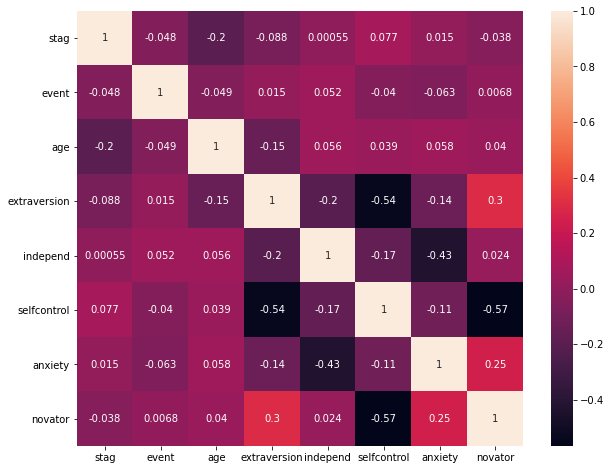

In [13]:
# create correlation matrix
corr = df.corr()

plt.figure(figsize=(10, 8))
# create heatmap using Seaborn library
sns.heatmap(corr, annot=True)
plt.show()

From this, we can see that our features do not show signs of correlation.

#### Distribution of our event/turnover feature

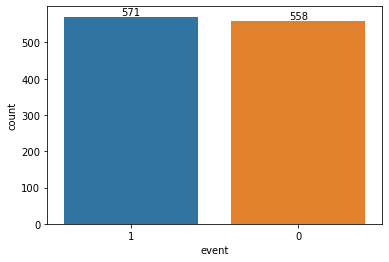

In [14]:
# create bar plot using Seaborn library
ax = sns.countplot(x='event', data=df, order=df['event'].value_counts(ascending=False).index)
# add count values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# display the plot
plt.show()

/Users/nicolasferreira/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


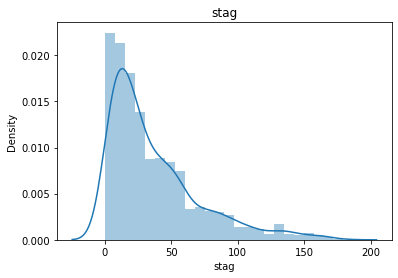

/Users/nicolasferreira/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


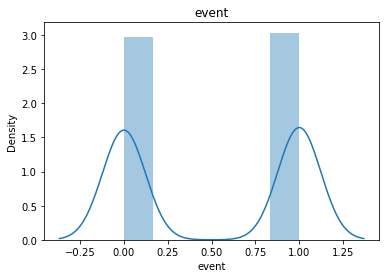

/Users/nicolasferreira/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


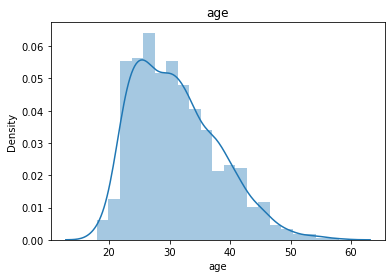

/Users/nicolasferreira/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


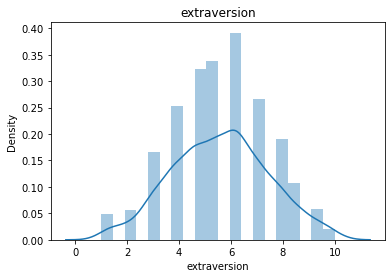

/Users/nicolasferreira/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


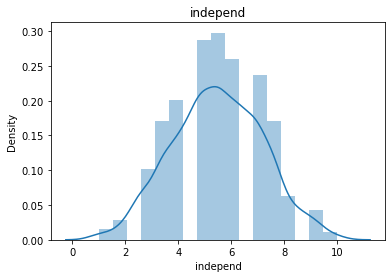

/Users/nicolasferreira/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


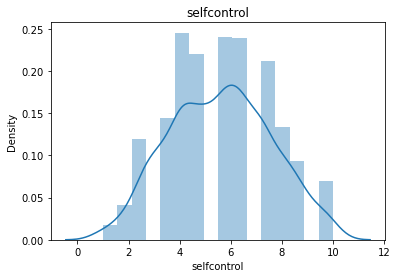

/Users/nicolasferreira/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


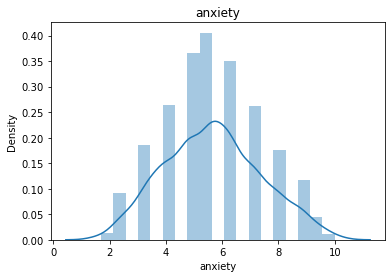

/Users/nicolasferreira/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


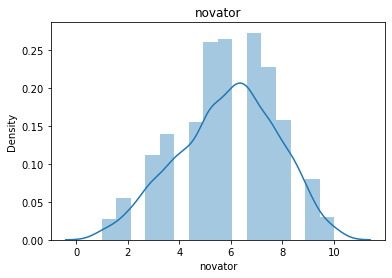

In [15]:
for name in int_names:
    sns.distplot(df[name])
    plt.title(name)
    plt.show()

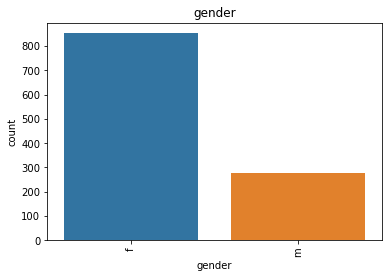

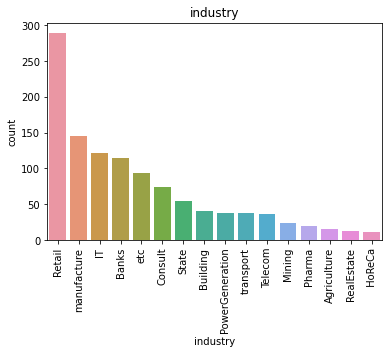

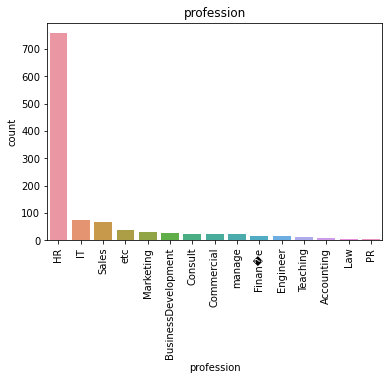

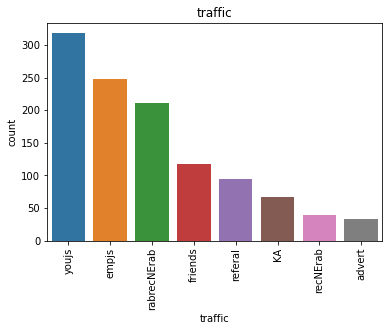

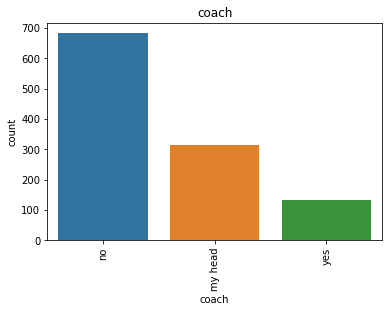

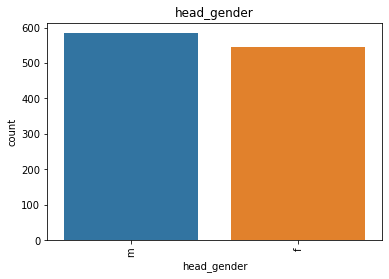

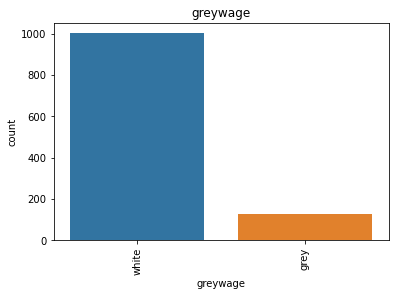

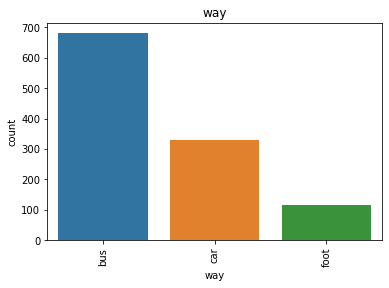

In [16]:
for name in cat_names:
    sns.countplot(x=name, data=df, order=df[name].value_counts().index[::1])
    plt.xticks(rotation=90)
    plt.title(name)
    plt.show()

### Some explorations about the distribution of the event feature vs. some explanatory variables

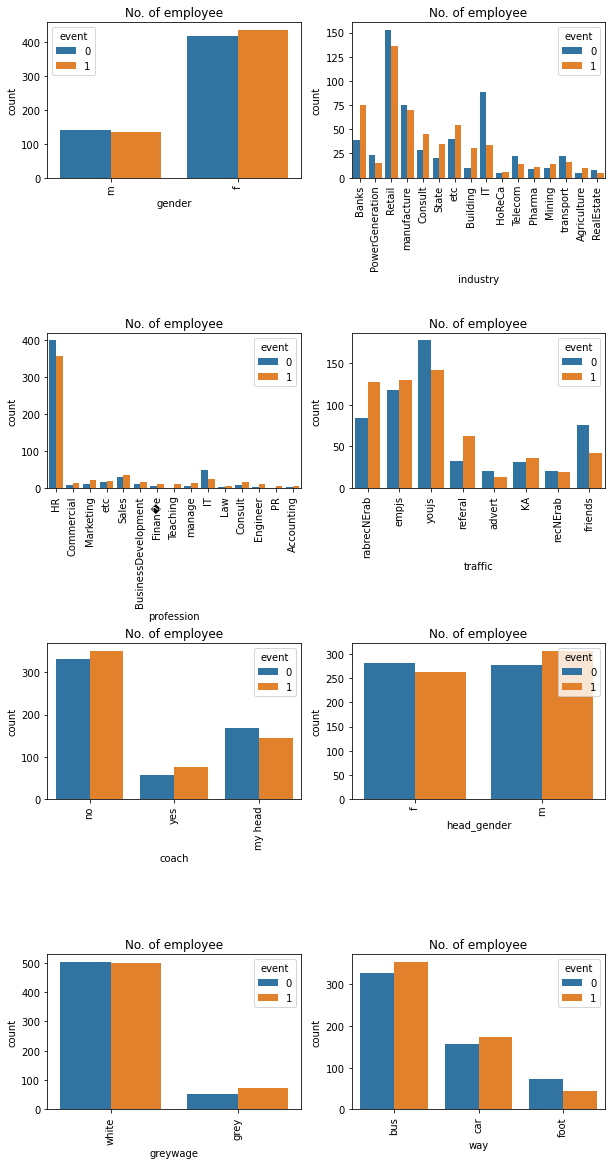

In [17]:
fig=plt.subplots(figsize=(10,20))
for i, j in enumerate(cat_names):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='event')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

## Feature engineering
#### We can transform the categorical variables with two values to a binary version of them
**Binary values**
* gender
* head_gender
* greywage

**Categorical variables to one-hot encode**
* traffic
* coach
* way

**Categorical variables to bin and transform**
* industry
* profession

**Every other numerical variable will be kept as it is**

Take top 5 values and group the others as 'OTHER'

Strip and upper every categorical variable first

In [18]:
# strip and upper categorical columns
df[cat_names] = df[cat_names].apply(lambda x: x.str.strip().str.upper())

#### Binary values transformation

In [19]:
# transformation of binary features
df['is_emp_male'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)
df['is_head_male'] = df['head_gender'].apply(lambda x: 1 if x == 'M' else 0)
df['is_wage_grey'] = df['greywage'].apply(lambda x: 1 if x == 'GREY' else 0)

#### Categorical variables one-hot-encoding

In [20]:
one_hot_columns = ['traffic', 'coach', 'way']

# create dummy variables for categorical columns
df_dummies = pd.get_dummies(df[one_hot_columns])

# concatenate dummy variables with original dataframe
df = pd.concat([df, df_dummies], axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stag                 1129 non-null   float64
 1   event                1129 non-null   int64  
 2   gender               1129 non-null   object 
 3   age                  1129 non-null   float64
 4   industry             1129 non-null   object 
 5   profession           1129 non-null   object 
 6   traffic              1129 non-null   object 
 7   coach                1129 non-null   object 
 8   head_gender          1129 non-null   object 
 9   greywage             1129 non-null   object 
 10  way                  1129 non-null   object 
 11  extraversion         1129 non-null   float64
 12  independ             1129 non-null   float64
 13  selfcontrol          1129 non-null   float64
 14  anxiety              1129 non-null   float64
 15  novator              1129 non-null   f

#### Bin and transform categorical with > 3 values
**industry and profession**

In [22]:
# define columns to transform
cols_to_transform = ['industry', 'profession']

# define number of most frequent values to keep
n_keep = 5

# get top n_keep most frequent values for each column
top_values = {}
for col in cols_to_transform:
    top_values[col] = list(df[col].value_counts().head(n_keep).index)

# replace values not in top n_keep with 'OTHER'
for col in cols_to_transform:
    df.loc[~df[col].isin(top_values[col]), col] = 'OTHER'

In [23]:
# replace values of 'ETC' with 'MISC'
df[cols_to_transform] = df[cols_to_transform].apply(lambda x: x.replace('ETC', 'MISC'))

In [24]:
for name in list(cols_to_transform):
    print('Column Name:', name)
    print('Unique Values:', df[name].unique())
    print('Unique Value #:', len(df[name].unique()))
    print('')

Column Name: industry
Unique Values: ['BANKS' 'OTHER' 'RETAIL' 'MANUFACTURE' 'MISC' 'IT']
Unique Value #: 6

Column Name: profession
Unique Values: ['HR' 'OTHER' 'MARKETING' 'MISC' 'SALES' 'IT']
Unique Value #: 6



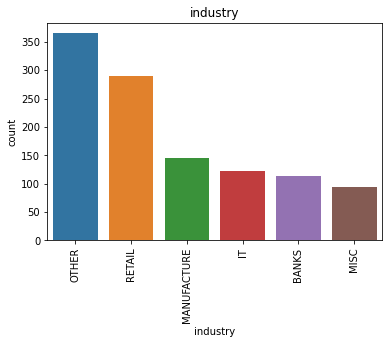

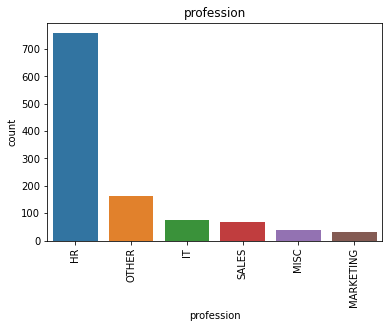

In [25]:
for name in cols_to_transform:
    sns.countplot(x=name, data=df, order=df[name].value_counts().index[::1])
    plt.xticks(rotation=90)
    plt.title(name)
    plt.show()

In [26]:
one_hot_columns = ['industry', 'profession']

# create dummy variables for categorical columns
df_dummies = pd.get_dummies(df[one_hot_columns])

# concatenate dummy variables with original dataframe
df = pd.concat([df, df_dummies], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   stag                  1129 non-null   float64
 1   event                 1129 non-null   int64  
 2   gender                1129 non-null   object 
 3   age                   1129 non-null   float64
 4   industry              1129 non-null   object 
 5   profession            1129 non-null   object 
 6   traffic               1129 non-null   object 
 7   coach                 1129 non-null   object 
 8   head_gender           1129 non-null   object 
 9   greywage              1129 non-null   object 
 10  way                   1129 non-null   object 
 11  extraversion          1129 non-null   float64
 12  independ              1129 non-null   float64
 13  selfcontrol           1129 non-null   float64
 14  anxiety               1129 non-null   float64
 15  novator              

In [28]:
# now we need to drop the columns that are already transformed
df = df.drop(['gender', 'industry', 'profession', 'traffic', 'coach', 'head_gender', 'greywage', 'way', 'coach'], axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   stag                  1129 non-null   float64
 1   event                 1129 non-null   int64  
 2   age                   1129 non-null   float64
 3   extraversion          1129 non-null   float64
 4   independ              1129 non-null   float64
 5   selfcontrol           1129 non-null   float64
 6   anxiety               1129 non-null   float64
 7   novator               1129 non-null   float64
 8   is_emp_male           1129 non-null   int64  
 9   is_head_male          1129 non-null   int64  
 10  is_wage_grey          1129 non-null   int64  
 11  traffic_ADVERT        1129 non-null   uint8  
 12  traffic_EMPJS         1129 non-null   uint8  
 13  traffic_FRIENDS       1129 non-null   uint8  
 14  traffic_KA            1129 non-null   uint8  
 15  traffic_RABRECNERAB  

## Predictive Modeling
### Learn who will churn?
Will use train_test_split to check performance metrics

In [30]:
X = df.drop(['event'], axis=1)
y = df['event']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [32]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier

In [33]:
# ignore warnings
warnings.filterwarnings("ignore")

# define models
models = [LogisticRegression, SVC, LinearSVC, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, Perceptron, SGDClassifier]
model_names = ['Logistic_Regression', 'Support_Vector_Machines', 'Linear_SVC', 
              'KNN', 'Decision_Tree', 'Random_Forest', 'Naive_Bayes', 
              'Perceptron', 'Stochastic_Gradient_Decent']
scores = []

for i, model in enumerate(models):
    classifier = model()
    classifier.fit(X_train, y_train)
    acc = round(classifier.score(X_test, y_test)*100, 2)
    scores.append(acc)
    
table = pd.DataFrame({'Model': model_names, 'Score': scores}).sort_values(by='Score', ascending=False)
print(table)

                        Model  Score
5               Random_Forest  69.03
6                 Naive_Bayes  67.70
0         Logistic_Regression  64.16
4               Decision_Tree  61.95
8  Stochastic_Gradient_Decent  59.73
3                         KNN  58.85
7                  Perceptron  52.65
1     Support_Vector_Machines  51.77
2                  Linear_SVC  50.44


Best model is Random Forest Classifier. Now we can run it to check other metrics

In [34]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71       108
           1       0.75      0.62      0.68       118

    accuracy                           0.69       226
   macro avg       0.70      0.70      0.69       226
weighted avg       0.70      0.69      0.69       226



[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

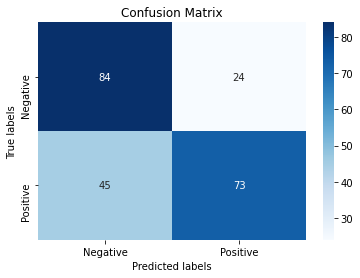

In [36]:
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')

# set plot labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# set tick labels
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

### When will they churn? Time till event prediction with GLM

In [91]:
y_time = y_train['stag']

In [98]:
y_test = y_test['stag']

In [99]:
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

# fit a gamma GLM model with log link function on the training data
gamma_model = sm.GLM(y_time, sm.add_constant(X_train), family=sm.families.Gamma(link=sm.families.links.log)).fit()

# predict the time till event for the testing data
y_pred = gamma_model.predict(sm.add_constant(X_test))

# evaluate the accuracy of the predictions using mean squared error
mse = mean_squared_error(y_test, y_pred)

print(f"The mean squared error of the predictions on the testing data is {mse:.2f} units^2.")


The mean squared error of the predictions on the testing data is 1061.10 units^2.


In [100]:
print(gamma_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   stag   No. Observations:                  903
Model:                            GLM   Df Residuals:                      872
Model Family:                   Gamma   Df Model:                           30
Link Function:                    log   Scale:                         0.75299
Method:                          IRLS   Log-Likelihood:                -4086.1
Date:                Sun, 05 Mar 2023   Deviance:                       771.91
Time:                        13:04:31   Pearson chi2:                     657.
No. Iterations:                    30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.9290 

# Kaplan-Meier

In [37]:
%pip install lifelines

Note: you may need to restart the kernel to use updated packages.


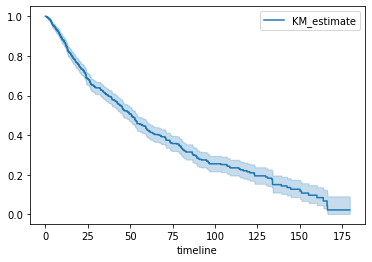

In [38]:
import lifelines
from lifelines import KaplanMeierFitter
kmf = lifelines.KaplanMeierFitter()
kmf.fit(df["stag"],df["event"])
kmf.plot_survival_function()
plt.show()

In [39]:
print(kmf.median_survival_time_)

50.72689938


In [40]:
print(kmf.survival_function_)

            KM_estimate
timeline               
0.000000       1.000000
0.394251       0.999114
0.427105       0.998229
0.492813       0.998229
0.525667       0.998229
...                 ...
163.811088     0.067756
164.566735     0.067756
166.078029     0.045170
166.275154     0.022585
179.449692     0.022585

[774 rows x 1 columns]


In [41]:
kmf.predict(30)

0.6399102141870332

<AxesSubplot:xlabel='timeline'>

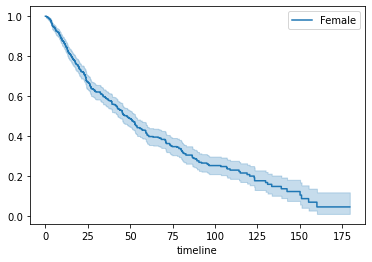

In [42]:
ax = plt.subplot(111)
emp_kmf = KaplanMeierFitter()
miR = (df["is_emp_male"]==0)
emp_kmf.fit(df[miR]["stag"],df[miR]["event"],label="Female")

emp_kmf.plot_survival_function(ax=ax)

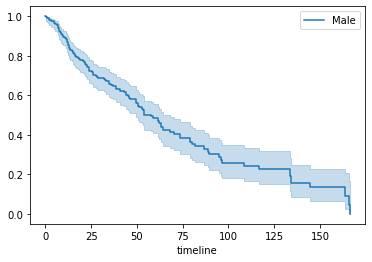

In [43]:
ax = plt.subplot(111)
miR = (df["is_emp_male"]==1)
emp_kmf = KaplanMeierFitter()
emp_kmf.fit(df[miR]["stag"],df[miR]["event"],label="Male")

emp_kmf.plot_survival_function(ax=ax)
plt.show()

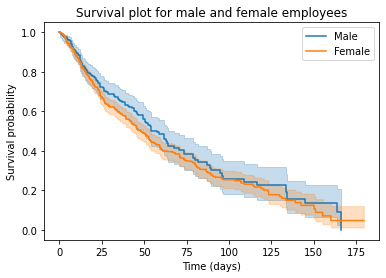

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Create a single subplot for the survival plot
fig, ax = plt.subplots()

# Fit and plot the Kaplan-Meier estimator for male employees
miR = (df["is_emp_male"]==1)
emp_kmf_male = KaplanMeierFitter()
emp_kmf_male.fit(df[miR]["stag"], df[miR]["event"], label="Male")
emp_kmf_male.plot_survival_function(ax=ax)

# Fit and plot the Kaplan-Meier estimator for female employees
miR = (df["is_emp_male"]==0)
emp_kmf_female = KaplanMeierFitter()
emp_kmf_female.fit(df[miR]["stag"], df[miR]["event"], label="Female")
emp_kmf_female.plot_survival_function(ax=ax)

# Set the title and axis labels for the plot
ax.set_title("Survival plot for male and female employees")
ax.set_xlabel("Time (days)")
ax.set_ylabel("Survival probability")

# Display the plot
plt.show()

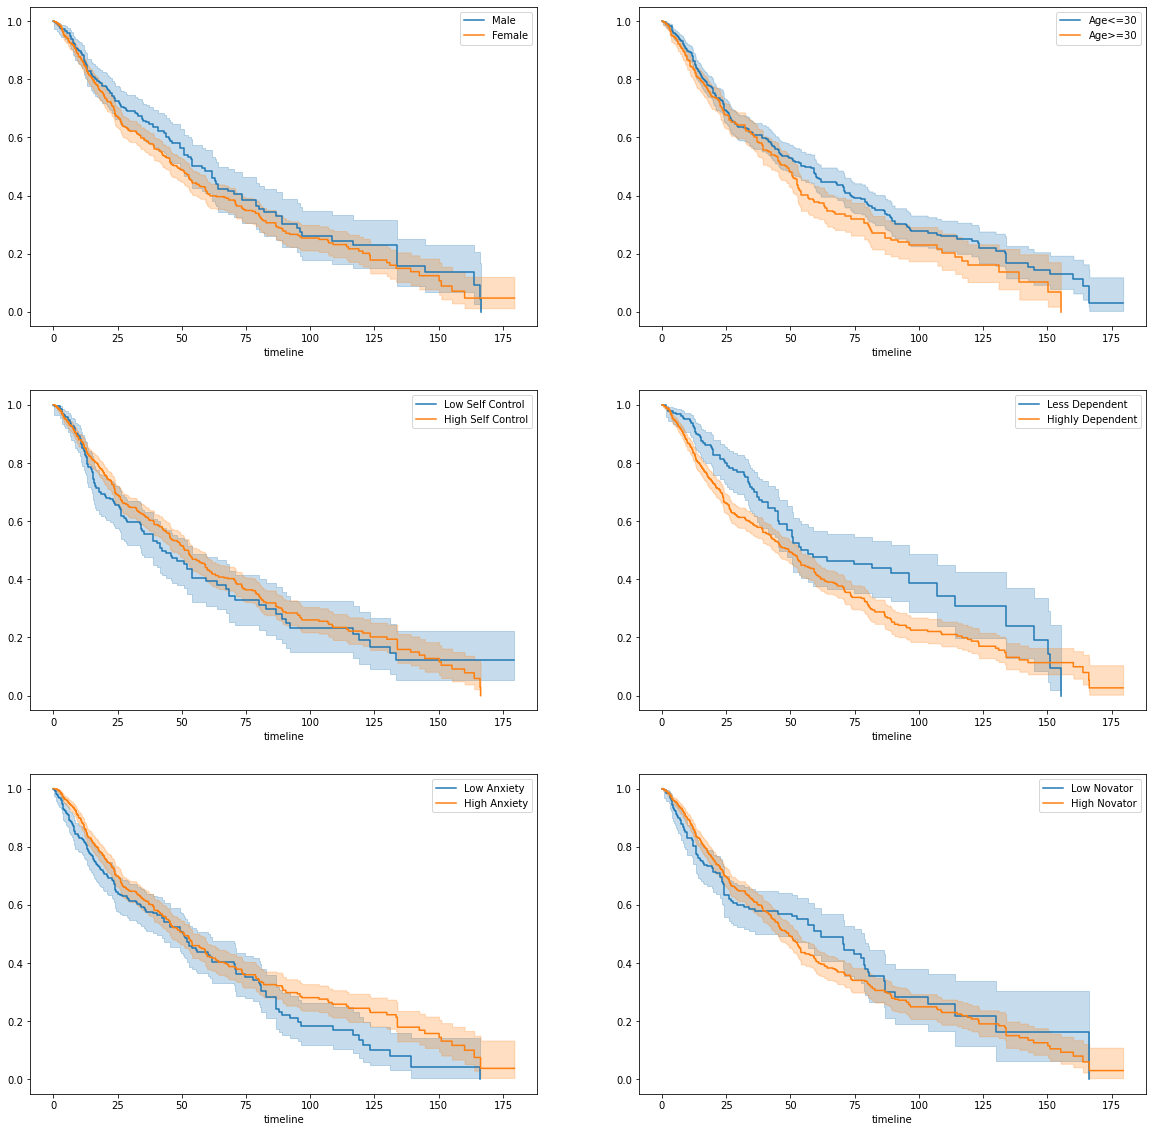

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

# Fit and plot the Kaplan-Meier estimator for male employees
miR = (df["is_emp_male"]==1)
emp_kmf_male = KaplanMeierFitter()
emp_kmf_male.fit(df[miR]["stag"], df[miR]["event"], label="Male")
emp_kmf_male.plot_survival_function(ax=axs[0,0])

# Fit and plot the Kaplan-Meier estimator for female employees
miR = (df["is_emp_male"]==0)
emp_kmf_female = KaplanMeierFitter()
emp_kmf_female.fit(df[miR]["stag"], df[miR]["event"], label="Female")
emp_kmf_female.plot_survival_function(ax=axs[0,0])

# Fit and plot the Kaplan-Meier estimator for male employees
miR = (df["age"]<=30)
emp_kmf_male = KaplanMeierFitter()
emp_kmf_male.fit(df[miR]["stag"], df[miR]["event"], label="Age<=30")
emp_kmf_male.plot_survival_function(ax=axs[0,1])

# Fit and plot the Kaplan-Meier estimator for female employees
miR = (df["age"]>30)
emp_kmf_female = KaplanMeierFitter()
emp_kmf_female.fit(df[miR]["stag"], df[miR]["event"], label="Age>=30")
emp_kmf_female.plot_survival_function(ax=axs[0,1])

# Fit and plot the Kaplan-Meier estimator for male employees
miR = (df["selfcontrol"]<=4)
emp_kmf_male = KaplanMeierFitter()
emp_kmf_male.fit(df[miR]["stag"], df[miR]["event"], label="Low Self Control")
emp_kmf_male.plot_survival_function(ax=axs[1,0])

# Fit and plot the Kaplan-Meier estimator for female employees
miR = (df["selfcontrol"]>4)
emp_kmf_female = KaplanMeierFitter()
emp_kmf_female.fit(df[miR]["stag"], df[miR]["event"], label="High Self Control")
emp_kmf_female.plot_survival_function(ax=axs[1,0])

# Fit and plot the Kaplan-Meier estimator for male employees
miR = (df["independ"]<=4)
emp_kmf_male = KaplanMeierFitter()
emp_kmf_male.fit(df[miR]["stag"], df[miR]["event"], label="Less Dependent")
emp_kmf_male.plot_survival_function(ax=axs[1,1])

# Fit and plot the Kaplan-Meier estimator for female employees
miR = (df["independ"]>4)
emp_kmf_female = KaplanMeierFitter()
emp_kmf_female.fit(df[miR]["stag"], df[miR]["event"], label="Highly Dependent")
emp_kmf_female.plot_survival_function(ax=axs[1,1])

# Fit and plot the Kaplan-Meier estimator for male employees
miR = (df["novator"]<=4)
emp_kmf_male = KaplanMeierFitter()
emp_kmf_male.fit(df[miR]["stag"], df[miR]["event"], label="Low Novator")
emp_kmf_male.plot_survival_function(ax=axs[2,1])

# Fit and plot the Kaplan-Meier estimator for female employees
miR = (df["novator"]>4)
emp_kmf_female = KaplanMeierFitter()
emp_kmf_female.fit(df[miR]["stag"], df[miR]["event"], label="High Novator")
emp_kmf_female.plot_survival_function(ax=axs[2,1])

# Fit and plot the Kaplan-Meier estimator for male employees
miR = (df["anxiety"]<=4)
emp_kmf_male = KaplanMeierFitter()
emp_kmf_male.fit(df[miR]["stag"], df[miR]["event"], label="Low Anxiety")
emp_kmf_male.plot_survival_function(ax=axs[2,0])

# Fit and plot the Kaplan-Meier estimator for female employees
miR = (df["anxiety"]>4)
emp_kmf_female = KaplanMeierFitter()
emp_kmf_female.fit(df[miR]["stag"], df[miR]["event"], label="High Anxiety")
emp_kmf_female.plot_survival_function(ax=axs[2,0])

# Set the title and axis labels for the plot
ax.set_title("Survival plot for male and female employees")
ax.set_xlabel("Time (days)")
ax.set_ylabel("Churn probability")

# Display the plot
plt.show()

# WeibullAFT

In [46]:
# Import WeibullFitter class
from lifelines import WeibullFitter

# Instantiate WeibullFitter class wb
wb = WeibullFitter()

In [47]:
wb.fit(df['stag'],df['event'])

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 1129 total observations, 558 right-censored observations>

<AxesSubplot:>

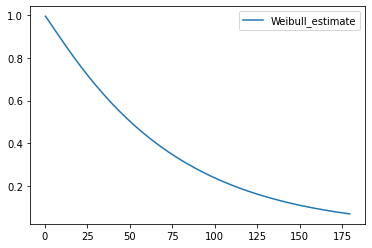

In [48]:
wb.survival_function_.plot()

In [49]:
wb.fit(df['age'],df['event'])

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 1129 total observations, 558 right-censored observations>

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
from lifelines import WeibullFitter

novator_wb = WeibullFitter()
novator_wb.fit(df[['novator']], df['event'])

extraversion_wb = WeibullFitter()
extraversion_wb.fit(df[['extraversion']], df['event'])

anxiety_wb = WeibullFitter()
anxiety_wb.fit(df[['anxiety']], df['event'])

self_wb = WeibullFitter()
self_wb.fit(df[['selfcontrol']], df['event'])

independ_wb = WeibullFitter()
independ_wb.fit(df[['independ']], df['event'])


<lifelines.WeibullFitter:"Weibull_estimate", fitted with 1129 total observations, 558 right-censored observations>

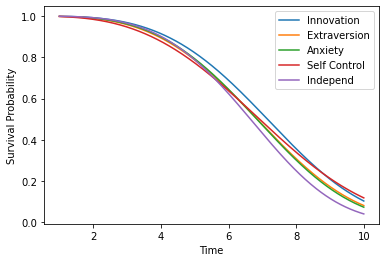

In [51]:
fig, ax = plt.subplots()
labels = ['Innovation', 'Extraversion', 'Anxiety', 'Self Control', 'Independ']
# plot survival function for each variable
novator_wb.survival_function_.plot(ax=ax, label='Innovation')
extraversion_wb.survival_function_.plot(ax=ax, label='Extraversion')
anxiety_wb.survival_function_.plot(ax=ax, label='Anxiety')
self_wb.survival_function_.plot(ax=ax, label='Self Control')
independ_wb.survival_function_.plot(ax=ax, label='Independ')

# add legend and axis labels
plt.legend(labels)
plt.xlabel('Time')
plt.ylabel('Survival Probability')

# show plot
plt.show()


<AxesSubplot:>

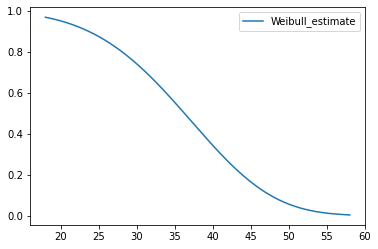

In [52]:
wb.survival_function_.plot()

In [53]:
print(wb.lambda_,wb.rho_)

39.39784546557458 4.435059346022021


When rho is greater than 1, it indicates that the probability of an employee leaving the company increases over time, which could suggest that there are factors within the organization that are leading to higher rates of employee turnover as they gain more tenure.


Survival Rate for different months

In [54]:
wb.predict(10)

0.9977167788510253

In [55]:
wb.predict(50)

0.056274393839438566

In [56]:
wb.predict(100)

9.276725365714685e-28

In [57]:
wb.predict(150)

5.575443994657771e-164

In [58]:
from lifelines import WeibullAFTFitter
aft=WeibullAFTFitter()
aft.fit(df,duration_col='stag',event_col='event')

<lifelines.WeibullAFTFitter: fitted with 1129 total observations, 558 right-censored observations>

In [59]:
aft.summary

coef  exp(coef)      se(coef)  \
param   covariate                                                 
lambda_ age                  -0.016589   0.983548  5.800459e-03   
        anxiety               0.053257   1.054701  2.851219e-02   
        coach_MY HEAD         0.098981   1.104045  5.148694e+06   
        coach_NO             -0.005742   0.994275  5.133470e+06   
        coach_YES            -0.161269   0.851063  5.145659e+06   
        extraversion         -0.013953   0.986144  2.907960e-02   
        independ              0.009841   1.009890  2.900824e-02   
        industry_BANKS       -0.430131   0.650424           NaN   
        industry_IT           0.361799   1.435910           NaN   
        industry_MANUFACTURE  0.036090   1.036749           NaN   
        industry_MISC        -0.194384   0.823342           NaN   
        industry_OTHER       -0.098309   0.906369           NaN   
        industry_RETAIL       0.201253   1.222935           NaN   
        is_emp_male           0.030166   1.030625  1.056685e-01   
        is_head_male         -0.128255   0.879629  8.223810e-02   
        is_wage_grey         -0.449035   0.638244  1.121746e-01   
        novator               0.004202   1.004211  2.526354e-02   
        profession_HR         0.120941   1.128558           NaN   
        profession_IT         0.346689   1.414377           NaN   
        profession_MARKETING -0.348635   0.705651           NaN   
        profession_MISC      -0.106255   0.899195           NaN   
        profession_OTHER     -0.221834   0.801049           NaN   
        profession_SALES     -0.106880   0.898634           NaN   
        selfcontrol           0.050367   1.051657  2.948855e-02   
        traffic_ADVERT        0.446171   1.562319           NaN   
        traffic_EMPJS        -0.378380   0.684970           NaN   
        traffic_FRIENDS       0.290490   1.337083           NaN   
        traffic_KA            0.246227   1.279190           NaN   
        traffic_RABRECNERAB   0.024774   1.025084           NaN   
        traffic_RECNERAB      0.467314   1.595703           NaN   
        traffic_REFERAL       0.211515   1.235549           NaN   
        traffic_YOUJS        -0.111379   0.894600           NaN   
        way_BUS              -0.122345   0.884843  3.723179e+06   
        way_CAR               0.066368   1.068620  3.723179e+06   
        way_FOOT              0.187099   1.205747  3.723179e+06   
        Intercept             4.266412  71.265499  1.529517e+06   
rho_    Intercept             0.148855   1.160505  3.303362e-02   

                              coef lower 95%  coef upper 95%  \
param   covariate                                              
lambda_ age                    -2.795743e-02   -5.220054e-03   
        anxiety                -2.625587e-03    1.091401e-01   
        coach_MY HEAD          -1.009125e+07    1.009126e+07   
        coach_NO               -1.006142e+07    1.006142e+07   
        coach_YES              -1.008531e+07    1.008531e+07   
        extraversion           -7.094814e-02    4.304180e-02   
        independ               -4.701390e-02    6.669630e-02   
        industry_BANKS                   NaN             NaN   
        industry_IT                      NaN             NaN   
        industry_MANUFACTURE             NaN             NaN   
        industry_MISC                    NaN             NaN   
        industry_OTHER                   NaN             NaN   
        industry_RETAIL                  NaN             NaN   
        is_emp_male            -1.769410e-01    2.372721e-01   
        is_head_male           -2.894382e-01    3.292920e-02   
        is_wage_grey           -6.688932e-01   -2.291768e-01   
        novator                -4.531356e-02    5.371768e-02   
        profession_HR                    NaN             NaN   
        profession_IT                    NaN             NaN   
        profession_MARKETING             NaN             NaN   
        prof

In [60]:
from lifelines import WeibullAFTFitter
cols=['stag', 'event','age','is_wage_grey','is_emp_male']
df_aft= df[cols]
df_aft = pd.get_dummies(df_aft, drop_first=True)
df_aft.head()

,stag,event,age,is_wage_grey,is_emp_male
0,7.030801,1,35.0,0,1
1,22.965092,1,33.0,0,1
2,15.934292,1,35.0,0,0
3,15.934292,1,35.0,0,0
4,8.410678,1,32.0,0,1


In [61]:
df_aft.loc[df_aft.stag == 0]= 1

In [62]:
aft=WeibullAFTFitter()
aft.fit(df_aft,duration_col='stag',event_col='event')

<lifelines.WeibullAFTFitter: fitted with 1129 total observations, 558 right-censored observations>

In [63]:
from lifelines import WeibullFitter, ExponentialFitter, LogNormalFitter
aft=WeibullAFTFitter()
Ex=ExponentialFitter()
LN=LogNormalFitter()
aft.fit(df_aft,'stag','event')
Ex.fit(df_aft['stag'],df_aft['event'])
LN.fit(df_aft['stag'],df_aft['event'])

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 1129 total observations, 558 right-censored observations>

In [64]:
print(aft.AIC_,Ex.AIC_,LN.AIC_)

6005.303561115507 6034.613147013611 6033.234095072619


In [65]:
from lifelines import utils
best_model, best_aic= utils.find_best_parametric_model(df_aft['stag'],df_aft['event'], scoring_method='AIC')

In [66]:
print(best_model)

<lifelines.SplineFitter:"SplineFitter: 3 internal knot", fitted with 1129 total observations, 558 right-censored observations>


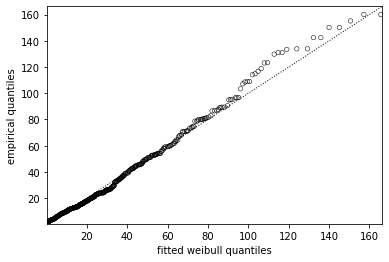

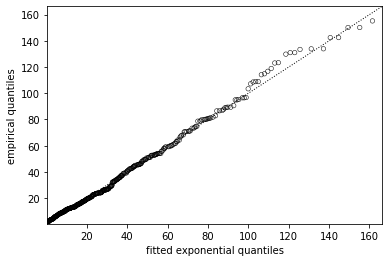

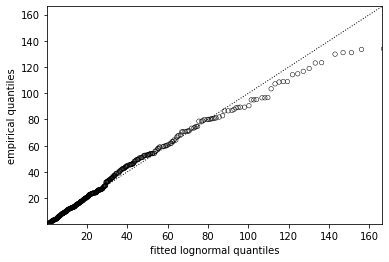

In [67]:
from lifelines.plotting import qq_plot
from lifelines import PiecewiseExponentialFitter
from lifelines import WeibullFitter, ExponentialFitter, LogNormalFitter
import matplotlib.pyplot as plt
#a=WeibullFitter()
#a.fit(dfa['Time'],dfa['Died'])
lst=[WeibullFitter(),ExponentialFitter(),LogNormalFitter()]

for model in lst:
    model.fit(df['stag'],df['event'])
    qq_plot(model)
    plt.show()

In [68]:
df_aft

,stag,event,age,is_wage_grey,is_emp_male
0,7.030801,1,35.0,0,1
1,22.965092,1,33.0,0,1
2,15.934292,1,35.0,0,0
3,15.934292,1,35.0,0,0
4,8.410678,1,32.0,0,1
...,...,...,...,...,...
1124,10.611910,0,41.0,0,0
1125,10.611910,0,41.0,0,0
1126,118.800821,0,34.0,0,0
1127,49.412731,0,51.0,1,0


# Cox-PH

In [69]:
from lifelines import CoxPHFitter

In [70]:
cph = CoxPHFitter(penalizer=0.01)   
cph.fit(df, 'stag', event_col='event')   
cph.print_summary()  

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.CoxPHFitter: fitted with 1129 total observations, 558 right-censored observations>
             duration col = 'stag'
                event col = 'event'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1129
number of events observed = 571
   partial log-likelihood = -3404.87
         time fit was run = 2023-03-05 01:24:15 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
age                    0.02       1.02       0.01             0.01             0.03                 1.01                 1.03
extraversion           0.02       1.02       0.03            -0.04             0.09                 0.96                 1.09
independ              -0.00       1.00       0.03            -0.07             0.06                 0.94                 1.06
selfcontrol           -0.05       0.95       0.03            -0.11             0.01                 0.89                 1.01
anxiety               -0.05       0.95       0.03            -0.12             0.01                 0.89                 1.01
novator               -0.00       1.00       0.03            -0.06             0.05                 0.94                 1.05
is_emp_male           -0.06       0.94       0.12            -0.30             0.18                 0.74                 1.19
is_head_male           0.14       1.15       0.09            -0.05             0.32                 0.95                 1.38
is_wage_grey           0.51       1.66       0.13             0.25             0.76                 1.29                 2.15
traffic_ADVERT        -0.50       0.61       0.43            -1.34             0.35                 0.26                 1.42
traffic_EMPJS          0.40       1.50       0.34            -0.26             1.07                 0.77                 2.92
traffic_FRIENDS       -0.32       0.73       0.36            -1.02             0.39                 0.36                 1.47
traffic_KA            -0.27       0.76       0.37            -0.99             0.46                 0.37                 1.58
traffic_RABRECNERAB   -0.01       0.99       0.34            -0.68             0.66                 0.51                 1.93
traffic_RECNERAB      -0.51       0.60       0.40            -1.30             0.27                 0.27                 1.31
traffic_REFERAL       -0.23       0.80       0.35            -0.92             0.47                 0.40                 1.60
traffic_YOUJS          0.13       1.13       0.34            -0.54             0.79                 0.58                 2.20
coach_MY HEAD         -0.11       0.90       0.41            -0.91             0.69                 0.40                 2.00
coach_NO               0.01       1.01       0.41            -0.79             0.81                 0.46                 2.24
coach_YES              0.19       1.20       0.42            -0.63             1.00                 0.53                 2.73
way_BUS                0.15       1.16       0.41            -0.65             0.95                 0.52                 2.58
way_CAR               -0.07       0.93       0.41            -0.88             0.73                 0.42                 2.07
way_FOOT              -0.22       0.80       0.43            -1.06             0.62                 0.35                 1.86
industry_BANKS         0.47       1.60       0.36            -0.22             1.17                 0.80                 3.21
industry_IT           -0.41       0.67       0.37            -1.14             0.32                 0.32                 1.38
industry_MANUFACTURE  -0.03       0.97       0.36            -0.72             0.67                 0.49                 1.95
industry_MISC          0.21       1.24       0.

In [71]:
import matplotlib.pyplot as plt

In [72]:
# compute the correlation matrix
corr_matrix = df.corr()

# define the correlation threshold
threshold = 0.7

# find the highly correlated columns
high_corr_cols = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_cols.add(colname)

high_corr_cols
# remove the highly correlated columns
# df.drop(high_corr_cols, axis=1)

{'coach_NO', 'way_CAR'}

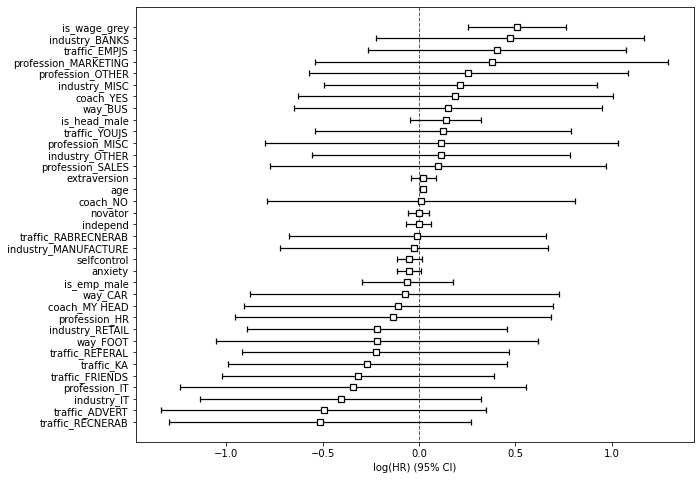

In [73]:
ax = cph.plot()
fig = ax.get_figure()
fig.set_size_inches(10, 8)
plt.show()

<AxesSubplot:>

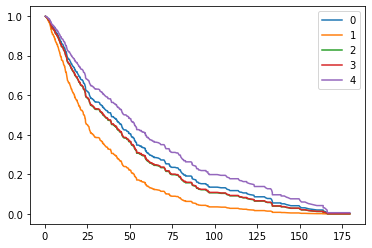

In [74]:
cph.predict_survival_function(df.iloc[0:5]).plot()

<AxesSubplot:>

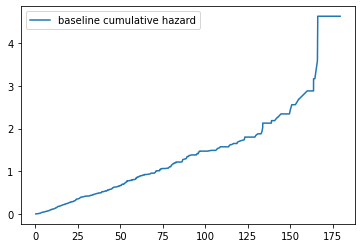

In [75]:
cph.baseline_cumulative_hazard_.plot()


# Random Survival Forest 

In [76]:
#!pip install scikit-survival

In [77]:
from sksurv.ensemble import RandomSurvivalForest

In [78]:
X = df.drop(['stag','event'], axis=1)
y = df[['event','stag']]

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=40)

In [80]:
aux = [(e1,e2) for e1,e2 in y_train.to_numpy()]
new_data_y = np.array(aux, dtype=[('Event', '?'), ('Time', '<f8')])


In [81]:
test_aux = [(e1,e2) for e1,e2 in y_test.to_numpy()]
test_data_y = np.array(test_aux, dtype=[('Event', '?'), ('Time', '<f8')])


In [82]:
rsf = RandomSurvivalForest(n_estimators=1000,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           n_jobs=-1,
                           random_state=40)

In [83]:
rsf.fit(X_train, new_data_y)


RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10,
                     n_estimators=1000, n_jobs=-1, random_state=40)

In [84]:
rsf.score(X_test, test_data_y)


0.6251915415262029

In [85]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rsf, X_test, test_data_y, n_repeats=15, random_state=40
)

In [86]:
pd.DataFrame(
    {k: result[k] for k in ("importances_mean", "importances_std",)},
    index=X_test.columns
).sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
is_wage_grey,3.036061e-02,0.010041
age,2.778118e-02,0.012374
traffic_EMPJS,1.862805e-02,0.013526
industry_BANKS,1.126775e-02,0.008675
way_BUS,8.948820e-03,0.005106
selfcontrol,7.431811e-03,0.008045
extraversion,5.909695e-03,0.006196
anxiety,5.128205e-03,0.005805
industry_RETAIL,4.167944e-03,0.005712
industry_OTHER,3.825723e-03,0.003239
